In [1]:
import pandas as pd
import altair as alt
import altair_latimes as lat

In [2]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [3]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [37]:
pitches = pd.read_csv("./input/lester-pitches.csv")

In [48]:
pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36288 entries, 0 to 36287
Data columns (total 91 columns):
pitch_type                         36288 non-null object
game_date                          36288 non-null object
release_speed                      36288 non-null float64
release_pos_x                      12734 non-null float64
release_pos_z                      12734 non-null float64
player_name                        36288 non-null object
batter                             36288 non-null int64
pitcher                            36288 non-null int64
events                             9193 non-null object
description                        36288 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               36288 non-null int64
des                                9193 non-null 

In [38]:
pitches['date'] = pd.to_datetime(pitches['game_date'])

In [39]:
pitches['season'] = pitches['date'].dt.year

In [43]:
pitches['pitch_name'] = pitches.pitch_type.map({
    'CH': 'Change',
    'CU': "Curve",
    'FC': 'Cutter',
    'FF': "Four seamer",
    'SI': "Sinker"
})

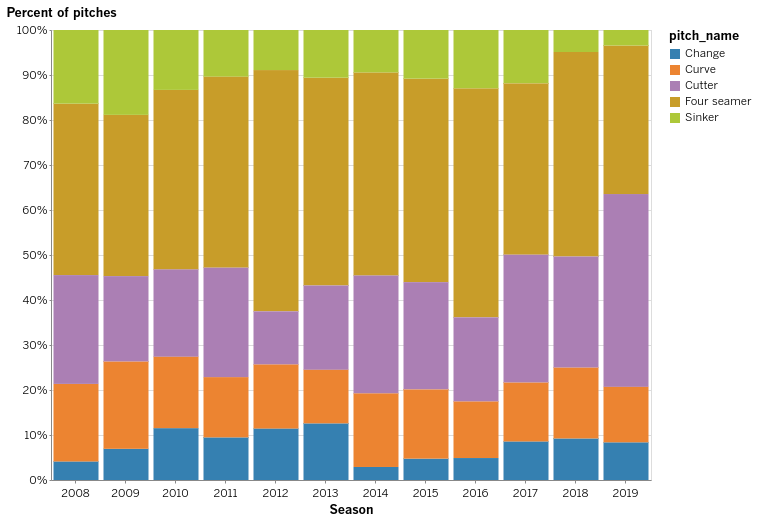

In [46]:
alt.Chart(pitches).mark_bar().encode(
    x=alt.X(
        "season:O",
        title="Season",
    ),
    y=alt.Y(
        "count():Q",
        stack="normalize",
        title="Percent of pitches",
        axis=alt.Axis(format='%')
    ),
    color="pitch_name:N",
    order=alt.Order(
      'pitch_name',
      sort='ascending'
    )
).properties(
    width=600
)

In [73]:
pitches.release_speed.describe()

count    36288.000000
mean        88.855228
std          5.969828
min         68.200000
25%         87.200000
50%         90.800000
75%         92.900000
max         99.100000
Name: release_speed, dtype: float64

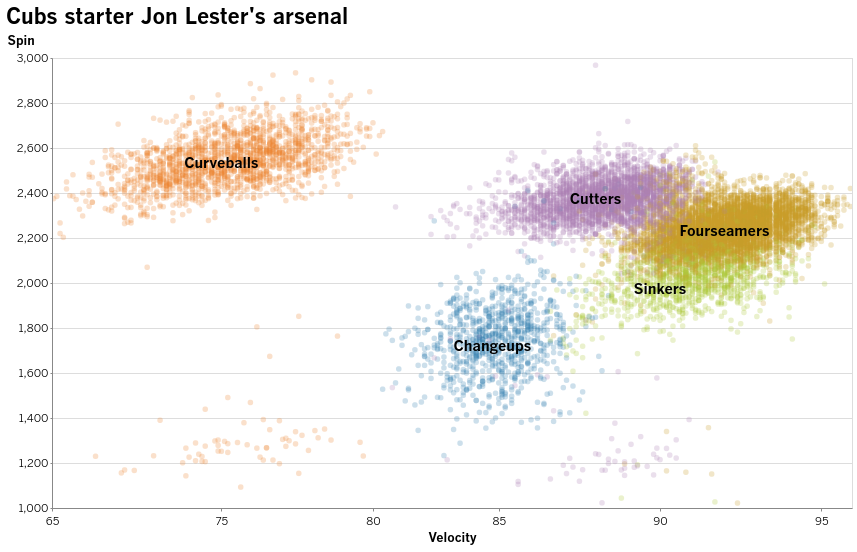

In [103]:
dots = alt.Chart(pitches).mark_circle(opacity=0.25, clip=True).encode(
    x=alt.X(
        "release_speed:O",
        title="Velocity",
       axis=alt.Axis(values=[65, 75, 80, 85, 90, 95])
    ),
    y=alt.Y(
        "release_spin_rate:Q",
        title="Spin",
        scale=alt.Scale(zero=False, domain=[1000, 3000])
    ),
    color=alt.Color(
        "pitch_name:N",
        legend=None
    )
)

a = {'x': [75], 'y': [2510], 'textof': ["Curveballs"]}
text = alt.Chart(pd.DataFrame(a)).mark_text(fontSize=15, font="Benton Gothic Bold").encode(
    x='x:O',
    y='y:Q',
    text='textof:N'
)

a2 = {'x': [84.8], 'y': [1700], 'textof': ["Changeups"]}
text2 = alt.Chart(pd.DataFrame(a2)).mark_text(fontSize=15, font="Benton Gothic Bold").encode(
    x='x:O',
    y='y:Q',
    text='textof:N'
)

a3 = {'x': [88], 'y': [2350], 'textof': ["Cutters"]}
text3 = alt.Chart(pd.DataFrame(a3)).mark_text(fontSize=15, font="Benton Gothic Bold").encode(
    x='x:O',
    y='y:Q',
    text='textof:N'
)

a4 = {'x': [92], 'y': [2210], 'textof': ["Fourseamers"]}
text4 = alt.Chart(pd.DataFrame(a4)).mark_text(fontSize=15, font="Benton Gothic Bold").encode(
    x='x:O',
    y='y:Q',
    text='textof:N'
)

a5 = {'x': [90], 'y': [1950], 'textof': ["Sinkers"]}
text5 = alt.Chart(pd.DataFrame(a5)).mark_text(fontSize=15, font="Benton Gothic Bold").encode(
    x='x:O',
    y='y:Q',
    text='textof:N'
)

(dots + text + text2 + text3 + text4 + text5).properties(
    title="Cubs starter Jon Lester's arsenal",
    width=800,
)